# Data Analyst Project - Titanic Data
by Gurpreet S Rai

## Introduction

For my final project, I have elected for the Titanic Dataset to conduct my own data analysis. 
The Titanic - the largest ship at the time it entered service – was a passenger liner that sank in the North Atlantic in the early morning of 15th April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York. Of the 2224 Passengers and crew aboard, more than 1500 died, making it one of the deadliest commercial maritime disasters in modern history. The ship carried both the wealthy, and emigrants from across Europe, and at the time was thought to be unsinkable. 
What interests me about this project, is the possibility to try to understand what factors may have affected the chances of survival for those aboard. 



##  Questions

The main areas I want to consider for my analysis will be to try and understand how the following factors affected the chances of survival:

1)	Demographics – How the class of the passengers affected survivability.

2)	Sex – How did survival rates differ between the sexes?

3)	Age – Did the age of passengers affected chances for survival?

4)	Family - How did having a family member aboard affect survival chances?


## Data Acquisition 


In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read in the csv titanic dataset
titanic_df = pd.read_csv("titanic_data.csv")

Let’s check the data has loaded correctly and confirm outlay of table and dataset.
The data dictionary has also been copied over below, to help better understand our data.

In [3]:
# Use the head function to list first 5 rows of dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
**Survival**	Survival [0=No, 1=Yes]

**Pclass**	Ticket class	[1 = 1st, 2 = 2nd, 3 = 3rd]

**Sex**	Sex	

**Age**	Age in years	

**SibSp**	# of siblings / spouses aboard the Titanic	

**Parch**	# of parents / children aboard the Titanic	

**Ticket**	Ticket number	

**Fare**	Passenger fare	

**Cabin**	Cabin number	

**Embarked**	Port of Embarkation	[C = Cherbourg, Q = Queenstown, S = Southampton]

## Data Cleaning

Now to further understand our data, lets confirm the total number of entries, if any rows of the columns are missing data (ie if number of rows in any of the columns are less than the total RangeIndex), and also the data type contained within each column. 

In [4]:
# call info() function to list concise summary of the dataframe 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From the above summary, we see there are a total number of 891 entries in 12 columns, but  3 columns ('Age', 'Cabin', 'Embarked') do not contain full records for all 891 entries.
Therefore to avoid the missing values affecting our analysis, each of these 3 columns need to be considered further.

##### Missing Data - Age

Lets first consider the Age coloumn, and confirm the number of missing values we have in our data.

In [5]:
# Calculate and output the number of missing Age data points
missing_age_data = titanic_df['Age'].isnull().sum()
missing_age_data

177

We can now confirm there are 177 missing values within the Age column. To reduce the effect this may have on my analysis that utilises the age records, I propose to substitute the missing values with random samples of the 'normal' distribution of the data present in the Age column.


In [6]:
# take the mean of the age column, and confirm value
mean_age = titanic_df["Age"].mean()
mean_age

29.69911764705882

In [7]:
# take the uncorrected standard deviation 
std_age = titanic_df["Age"].std(ddof=0)

In [8]:
# generate the required number of sample data points, and store in variable
random_sample = np.random.normal(mean_age, std_age, missing_age_data)

In [9]:
# splice dataframe column with boolean index array of missing values, 
# and replace missing datapoints with the random samples generated earlier  
titanic_df["Age"][np.isnan(titanic_df["Age"])] = random_sample

/Users/gurps/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [10]:
# change Age values type to integers
titanic_df["Age"] = titanic_df["Age"].astype(int)

In [11]:
# check mean value is within range of original mean value of approx 29.7
mean_age = titanic_df["Age"].mean()
mean_age

29.085297418630752

##### Family members on-board ?
From the Data dictionary, we see both 'SibSp'(sibling & spouse), and 'Parch'(parent, child), donate a family member.  Therefore, to help to determine if a family member on-board had an impact on survival, both these columns can then be reduced to a single 'Has_Family' column.  


In [12]:
# By vectorized operation, add both 'Sibsp' & 'Parch' columns 
# to new 'has_family' column
titanic_df["Has_Family"] = titanic_df["SibSp"] + titanic_df["Parch"]

In [13]:
# To keep values in new 'Has_Family' column as binary, call function with 
# apply function to reduce any 'True' values to 1, with all other values 
# kept as 0.
def binary_value(n):
    if n > 0:
        return 1
    else:
        return 0
titanic_df["Has_Family"].apply(binary_value)

# confirm new column has been correctly modified
titanic_df['Has_Family'].head()

0    1
1    1
2    0
3    1
4    0
Name: Has_Family, dtype: int64

##### Missing Data - Cabin & Embarked 
Now let’s consider the two remaining columns with missing data-points - Cabin & Embarked. 
Cabin, has so many missing values – only 204 valid values out of the total 891 entries.
Embarked, at this time appears unlikely to have had any effect on the survivability of the disaster.
Taking the above points into accounts, I propose to remove both sets of data from the Datafame.


In [14]:
# remove both Cabin & Embarked entries along the column axis
titanic_df = titanic_df.drop(['Cabin', 'Embarked'], axis=1)

In [15]:
# check the age column is now complete and in integer type, 
#'Has_Family' is present and both 'Cabin' & 'Embarked' have been removed.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Has_Family     891 non-null int64
dtypes: float64(1), int64(7), object(3)
memory usage: 76.6+ KB


As we see above, we now have the full datasets for those columns I want consider for my analysis.


## Data Exploration 

In [16]:
# To help better understand the data set, lets take a closer look
# with the describe function - to generate various summaries from the
# Dataframe. 
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.085297,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.698831,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,-8.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,19.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


We can see from the above data the mean survival is 0.38 – or 38%. 
Let’s take a further look into a few of the groups which I wanted to consider for my analysis - starting with demographics and sex.


In [17]:
# drop the PassengerId, and group by Pclass and Sex
titanic_df_drop_id = titanic_df.drop('PassengerId', axis=1)
grouped_pclass_sex = titanic_df_drop_id.groupby(['Pclass', 'Sex'])

In [18]:
# generate summary stats of the group
grouped_pclass_sex.describe()

Age        Fare  Has_Family       Parch  \
Pclass Sex                                                            
1      female count   94.000000   94.000000   94.000000   94.000000   
              mean    33.457447  106.125798    1.010638    0.457447   
              std     14.159358   74.259988    1.102243    0.728305   
              min     -1.000000   25.929200    0.000000    0.000000   
              25%     22.000000   57.244800    0.000000    0.000000   
              50%     33.000000   82.664550    1.000000    0.000000   
              75%     43.750000  134.500000    1.000000    1.000000   
              max     63.000000  512.329200    5.000000    2.000000   
       male   count  122.000000  122.000000  122.000000  122.000000   
              mean    38.991803   67.226127    0.590164    0.278689   
              std     16.176453   77.548021    0.951329    0.658853   
              min      0.000000    0.000000    0.000000    0.000000   
              25%     28.000000   27.728100    0.000000    0.000000   
              50%     38.500000   41.262500    0.000000    0.000000   
              75%     49.000000   78.459375    1.000000    0.000000   
              max     80.000000  512.329200    5.000000    4.000000   
2      female count   76.000000   76.000000   76.000000   76.000000   
              mean    28.565789   21.970121    1.092105    0.605263   
              std     12.798266   10.891796    1.190828    0.833930   
              min      2.000000   10.500000    0.000000    0.000000   
              25%     22.000000   13.000000    0.000000    0.000000   
              50%     28.000000   22.000000    1.000000    0.000000   
              75%     36.000000   26.062500    2.000000    1.000000   
              max     57.000000   65.000000    5.000000    3.000000   
       male   count  108.000000  108.000000  108.000000  108.000000   
              mean    30.444444   19.741782    0.564815    0.222222   
              std     14.875391   14.922235    0.888905    0.517603   
              min      0.000000    0.000000    0.000000    0.000000   
              25%     23.000000   12.331250    0.000000    0.000000   
              50%     30.000000   13.000000    0.000000    0.000000   
              75%     37.250000   26.000000    1.000000    0.000000   
              max     70.000000   73.500000    3.000000    2.000000   
3      female count  144.000000  144.000000  144.000000  144.000000   
              mean    23.243056   16.118810    1.694444    0.798611   
              std     13.512619   11.690314    2.232242    1.237976   
              min     -3.000000    6.750000    0.000000    0.000000   
              25%     14.750000    7.854200    0.000000    0.000000   
              50%     22.000000   12.475000    1.000000    0.000000   
              75%     31.000000   20.221875    2.000000    1.000000   
              max     63.000000   69.550000   10.000000    6.000000   
       male   count  347.000000  347.000000  347.000000  347.000000   
              mean    26.533141   12.661633    0.723343    0.224784   
              std     13.030020   11.681696    1.751499    0.623404   
              min     -8.000000    0.000000    0.000000    0.000000   
              25%     19.000000    7.750000    0.000000    0.000000   
              50%     25.000000    7.925000    0.000000    0.000000   
              75%     33.500000   10.008300    0.000000    0.000000   
              max     74.000000   69.550000   10.000000    5.000000   

                          SibSp    Survived  
Pclass Sex                                   
1      female count   94.000000   94.000000  
              mean     0.553191    0.968085  
              std      0.665865    0.176716  
              min      0.000000    0.000000  
              25%      0.000000    1.000000  
              50%      0.000000    1.000000  
              75%      1.000000    1.000000  
              max      3.000000    1.000000  
       male   cou

We can see from the above summary of each group, Sex and Pclass shows differing survival rates. 
Let’s take a more detailed look at these groups with regard to the Survived means.


In [19]:
# mean Survived of Pclass and Sex, and unstack dataframe 
# to show coloumn names
survived_pclass_sex = grouped_pclass_sex['Survived']
table_sex_pclass = survived_pclass_sex.mean().unstack(level=-1)
table_sex_pclass

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


This table shows the mean survival of both Pclass and Sex of the passengers. 
The most striking thing already is the mean survived rates between the sexes and classes of those on-board. 1st class female survival rates are 97%, and those for 3rd class males are as low as 14%.
Let’s plot to better illustrate, and compare these findings.


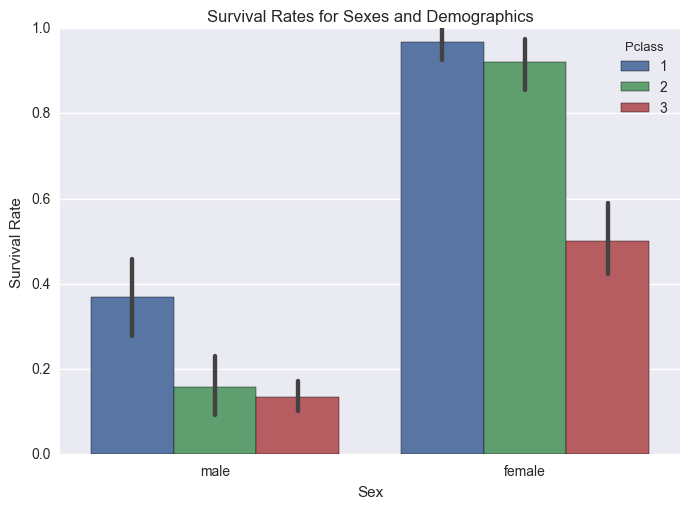

In [20]:
# plot to illustrate the above table
sns.barplot(data=titanic_df, x='Sex', y='Survived', hue='Pclass')
plt.title('Survival Rates for Sexes and Demographics')
plt.ylabel('Survival Rate')

The above bar plot shows a clear correlation for survival rates between the sexes and demographics. With a greater probability for females to survive, and demographics also contributing to survival chances  - with higher class passengers appearing to fair better than the lower classes.


As both the sex and demographics appear to show a robust correlation, let’s better illustrate these variables over several differing plots. 


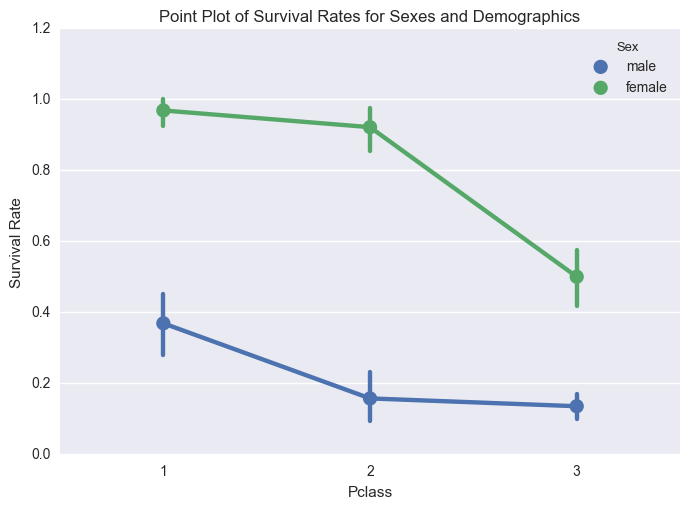

In [21]:
sns.pointplot(data=titanic_df, x='Pclass', y='Survived', hue='Sex')
plt.title('Point Plot of Survival Rates for Sexes and Demographics')
plt.ylabel('Survival Rate')

The above plot also shows the clear divide between the sexes and classes on the mean survival rates – with female members having a greater chance of survival. 


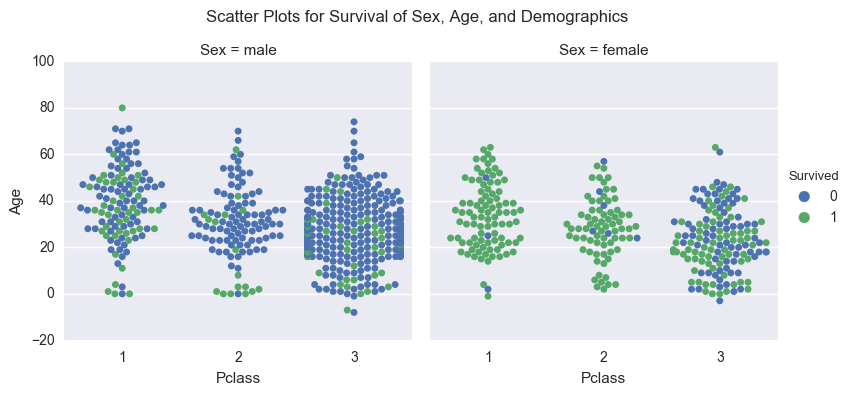

In [22]:
sns.factorplot(x="Pclass", y="Age", hue="Survived",
               col="Sex", data=titanic_df, kind="swarm")
sns.plt.suptitle('Scatter Plots for Survival of Sex, Age, and Demographics', fontsize=12)
sns.plt.subplots_adjust(top=.85)

Again, the twin ‘swarm’ plots, help to illustrate the correlation of mean survival between the sexes and demographics, and a slightly lower average age of the lower classed passengers.


Before considering the mean survival with regard to Age, I want to understand the demographics of the various ages, as these may latter have a bearing on my results.

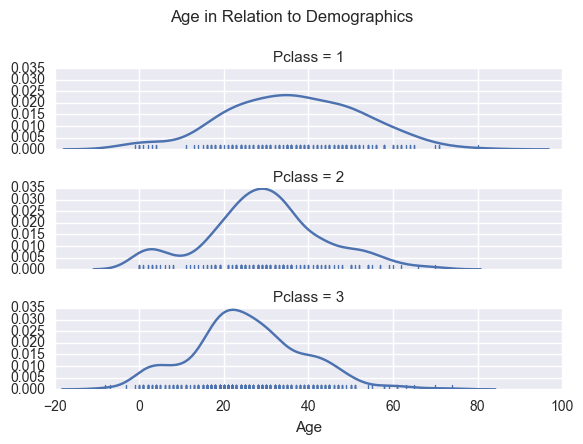

In [23]:
# age variance in each class
g = sns.FacetGrid(titanic_df, row="Pclass", size=1.5, aspect=4,)
g.map(sns.distplot, "Age", hist=False, rug=True);
g.fig.suptitle('Age in Relation to Demographics', fontsize=12)
g.fig.subplots_adjust(top=.85)

From this plot, we see the number of lower class passengers (2nd & 3rd), appear to be slightly skewed to the younger end of the spectrum – most visible with the 3rd class passengers, which appear to have the youngest adult population.



Let's now have a look at the mean survival rates with regard to Age.

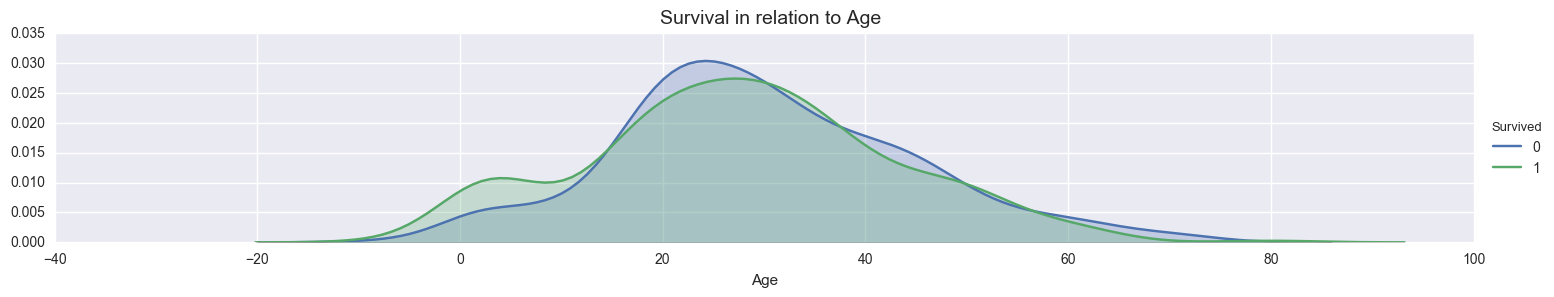

In [24]:
# plot of those that survived, against those that did not, by age.
g = sns.FacetGrid(titanic_df, hue="Survived",aspect=5)
g.map(sns.kdeplot,'Age',shade= True)
g.add_legend()
g.fig.suptitle('Survival in relation to Age', fontsize=14)
g.fig.subplots_adjust(top=.9)

The above plot shows there appears to be a slight increase in the chance of mortality between those aged in their 20-30's, however there also appears to be a large increase of survival of the very young, let’s take a look at this in closer detail.


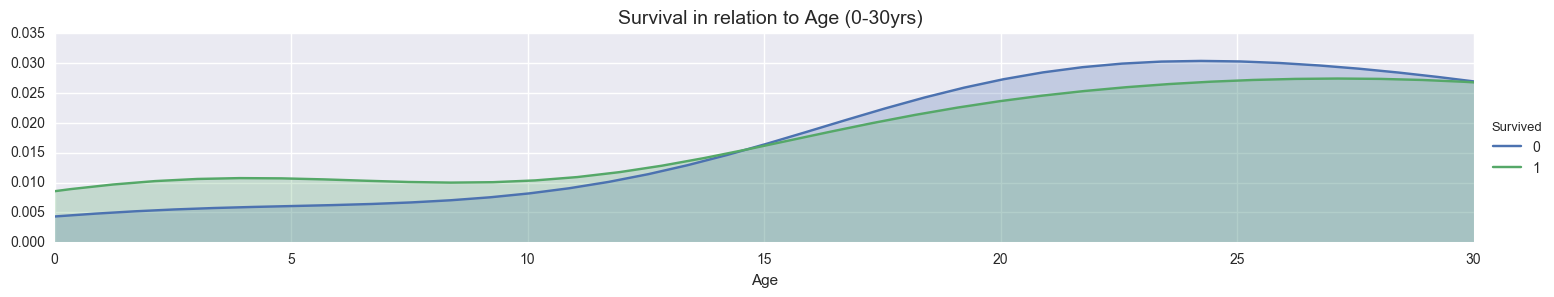

In [25]:
# limit the x axis, to take closer look at plot between 0-30
g = sns.FacetGrid(titanic_df, hue="Survived",aspect=5)
g.map(sns.kdeplot,'Age',shade= True)
g.set(xlim=(0, 30))
g.add_legend()
g.fig.suptitle('Survival in relation to Age (0-30yrs)', fontsize=14)
g.fig.subplots_adjust(top=.9)

From the defined plot above, we see that children up to at least 10 years old appear to have a much greater chance for survival, but this trend changes from 15years old, where mortality looks like it increases up to almost 30 years old.


We found a correlation between the sexes and chances for survival, let’s now plot sex with age, to see if we can identify how this may have had an effect.


([<matplotlib.axis.YTick at 0x11d8d3e90>,
 <a list of 2 Text yticklabel objects>)

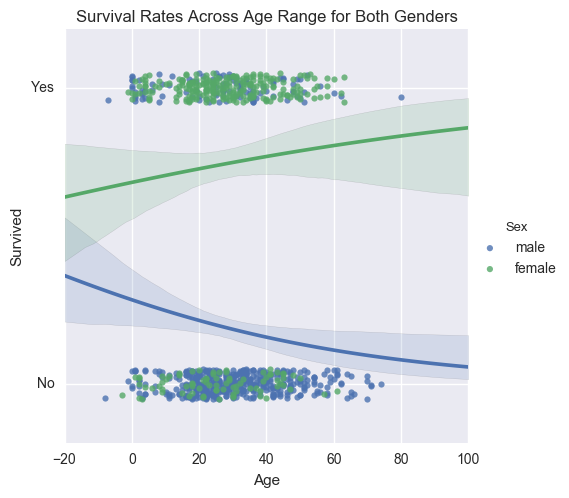

In [26]:
# Linear regression of survival proability of age and sex
# Using Logistic Regression as one of the variables (Survived) is in binary
sns.lmplot(x="Age", y="Survived", hue="Sex", data=titanic_df,
           y_jitter=.05, logistic=True)
plt.title('Survival Rates Across Age Range for Both Genders')
plt.ylabel('Survived')
plt.yticks([0,1], ['No', 'Yes'])

With this statistical linear regression, we find a signal between the sexes and ages. With females appearing to fair better with age, and males less so. 


Now let’s consider how having family on-board affected survivability


In [27]:
# Group 'Has_family' with survival rates, and output mean across the range 
groupby_family = titanic_df_drop_id.groupby('Has_Family').mean()['Survived']
groupby_family

Has_Family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

We see a potential increase of survival, for those having between 1-3 family members aboard.
Let’s bar plot these values to better illustrate this data. 


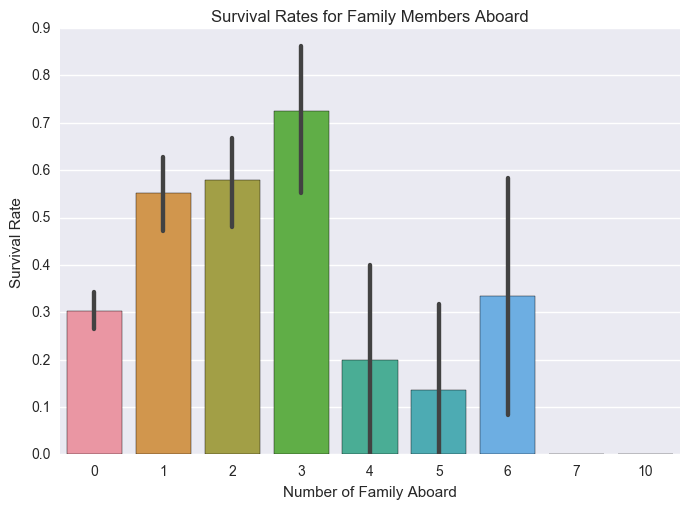

In [28]:
sns.barplot(data=titanic_df, x='Has_Family', y='Survived')
plt.title('Survival Rates for Family Members Aboard')
plt.ylabel('Survival Rate')
plt.xlabel('Number of Family Aboard')

This plot better illustrates the slight increase of surviving for those who had 1-3 members of family on-board, but this affect also appears to drop off with 4 or more.


## Findings & Conclusions:

For my project, I asked how factors, such as demographics, sex, age and family may have affected the chances of survival of both passengers and crew members. From my analysis, I can now share my initial findings and tentative conclusions


### Demographics
From the data analysis, we can find a correlation between the class of passenger and their chances of survival. What appears in several of the plots is a tendency for a likely increased chance of survival for those passengers in higher classes. 


### Sex
There appears to a clear correlation between the sexes and survivability of those on-board, with female passengers having a much higher chance of surviving the disaster. This may not be that surprising, as it is probably due to the Birkenhead Drill (Women and Children First code of conduct), whether from training of the crew or the sensibilities of all those of board.



### Age
The correlation between age and survival chances were not very clear, though there did seem a slight increase of surviving for the very young (below the age of 10), again this may be from the Birkenhead drill. A few other possible correlations appear to show a slight decrease in surviving for those between 20-30, however without further analysis, or even more data, it is not really possible at this time to differentiate these possible indictors from other variables like demographics etc.


### Family
I wanted to know if having family members aboard made a difference for the chances of survival. From the analysis, there appears to be a correlation with those who had at least one member of family aboard and having a slightly better chance for survival, but this affect also drops off after having 4 or more family aboard. Again, this is a tentative finding, as without understating how this may also be affected by other variables, for example a split between parents and siblings, and demographics, it is not possible to fully explain the findings at this time.


### Overall
Though these are my initial tentative findings, the clearest correlations appear to be with the demographics and sex of those aboard with regard to their chances for surviving the disaster. Female 1st class passengers had a 97% chance for surviving, and on the other scale, men in the 3rd class had the lowest survivability with only a 14% chance of surviving. 
Having Family aboard also showed a correlation, with those with 1-3 members having a slight increase in surviving, but again this would need further analysis to determine if other factors played apart. 
Age probably showed the smallest correlation, with a small increase of surviving for those below the age of 10, but without re-looking at this data with other possible contributing factors, for example demographics, it is not really clear how age itself played a part in surviving. 


### Possible further analysis
A further analysis of the cabins and decks may provide an insight in to how the passenger and crew locations may have affected the chances of surviving – even with the limited dataset. As the passenger and crew locations may have allowed for easier access to the top deck, and to the limited number of lifeboats.
My analysis of the age data appears to show young children had an increased chance for survival, but was this dependant on any other factors, ie number of parents/siblings aboard, demographic etc.?
Though passengers having 1-3 members of family appear to show a better chance for surviving, it would be interesting to see how both demographics and decks affected this outcome. For example, how many children were in each of the classes and how did each group fair? 
Another possible route of investigation, could be to look how passenger fares affected the chances of survival? Is the demographic data directly in-line with the fare costs? If not, what has greater effect on survivability, passenger class or fare paid?


## Accreditations and resources used 
To drop columns from pandas [stackover flow](http://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe)

Working with missing data  [pandas documentation 0.19.2](http://pandas.pydata.org/pandas-docs/stable/missing_data.html)

Taking random samples from a normal distribution, from  [SciPy.org](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html)

Data dictionary of the titanic data, from [Kaggle.com]  (https://www.kaggle.com/c/titanic/data)
